# afmToolBox
This example breifly demonstrates how to use the toolbox, which is designed to process atomic force microscopy (AFM) approach and retraction curves from a Bruker Multimode AFM. Modifications can be made to process data from other AFMs. The software is also capable of determining the final pull-off event by a method of rolling averages, which can then be subsequently used in calculations of the Worm-like chain (WLC) model. Further information on the WLC model is explored by [Butt, Cappella and Kappl](https://doi.org/10.1016/j.surfrep.2005.08.003).

We start by loading in the appropriate packages. 

In [1]:
import sys
import glob

sys.path.insert(1, '../')
from afm_bruker import AFM

## Load the data

In [2]:
fh = "polyBrush"
files = sorted(glob.glob("data/*.txt"))

Spring constant =  0.067


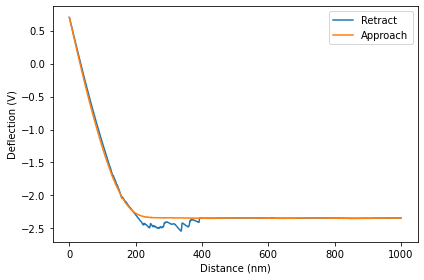

In [3]:
afm = AFM()

afm.load_data(files[2])
afm.plot_raw()

# If you define a spring constant here, the software will use that value. Else it will extract from the data file.
# afm.SprCons = 0.067
print('Spring constant = ', afm.SprCons)

## Polymer properties
We will also include important properties of the polymer, which will be used later to determine molecular weight, grafting density, etc.

In [4]:
afm.MM = 150                # molecular mass of the moonomer, in g/mol
afm.a = 0.3e-9              # size of the monomer backbone, in m
afm.h_dry = 15.84 * 1e-9    # dry thickness of the polymer film, in m

## Correct the baseline
Left figure shows the region of the baseline used for correction. Right figure shows the corrected data.

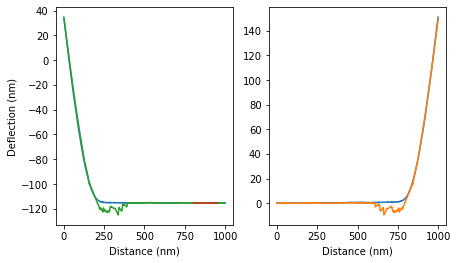

In [5]:
afm.baseline_corr(plot = True)

## Calibrate $x$ 
Here we calibrate the domain to be apparent separation using the constant compliance region. Left panel shows the constant compliance region used for the calibration and right panel shows calibrated data.

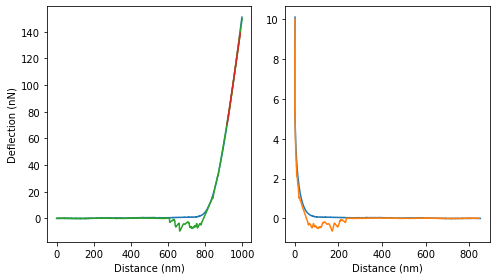

In [6]:
afm.x_cal(plot = True)

# Save data
Save the data for later use

In [7]:
save_name = files[2][:-4]
print(save_name)

afm.save_data(save_name)

data\polyBrush.002
creating dir


# Fitting the WLC model to the final 'pull-off' event
Here we use the final pull off event to fit the data to the worm-like chain model to obtain the contour length and the persistence length.

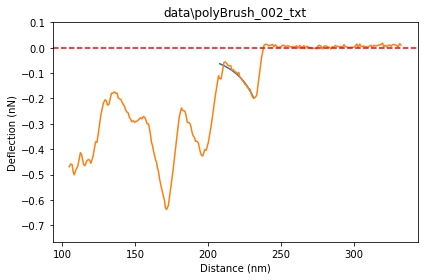

In [8]:
afm.final_pulloff()
params = afm.auto_params()
afm.wlc_fit(params, show_plot = True)

In [9]:
print(afm.L_p, afm.L_c)

3.288798521371433e-10 2.636057208288532e-07


From here, futher parameters can be determined, such as the molecular weight of the polymer, grafting density and radius of gyration.

In [10]:
afm.summary_stats(True)

Polymer MW: 131802.86 g/mol
Grafting Density: 0.0912 chains/m$^2$
Chain density: 1 chain per 3.31 nm
Radius of gyration: 6.60 nm
Reduced grafting density: 12.48


## Batch process our curves
Here we load the `AFM` Class and use `batch_process` to load all data in `files`, baseline correct (`basline_corr`) and perform a calibration (`x_cal`) on all the data.
Processed data and figures are then saved in a 'processed_data' folder, which is created if it doesn't exist.
As `WLC = True` here, the software will also determine the final pull-off event (`final_pulloff`) and fit the WLC model to the final pull-off event (`wlc_fit`). A summary of the WLC parameters are also saved in `wlc_summary.xlsx` spreadsheet.

In [11]:
afm = AFM()
afm.batch_process(files, WLC=True, method="differential_evolution")

  0%|          | 0/5 [00:00<?, ?it/s]

making wlc file
wrong way data\polyBrush.004.txt
6 curves processed and 0 curves discarded.


In [12]:
afm.summary_stats(True)

Polymer MW: 85133.02 g/mol
Grafting Density: 0.0891 chains/m$^2$
Chain density: 1 chain per 3.35 nm
Radius of gyration: 7.45 nm
Reduced grafting density: 15.54


In [13]:
afm.SprCons

0.067